# Code demo for Physiopy's ReproNim webinar: <br>"Physiopy Community: working towards accessible and reproducible data usage in neuroimaging studies"

This tutorial is showcasing three python library's developped and/or maintained by the [Physiopy community](https://physiopy.github.io/):
<ul>
<li><a href="https://github.com/physiopy/phys2bids">phys2bids</a>: to format physiological data in BIDS</li>
<li><a href="https://github.com/physiopy/peakdet">peakdet</a>: to preprocess physiological data and perform peak detection</li>
<li><a href="https://github.com/physiopy/phys2denoise">phys2denoise</a>: to prepare physiological data for fMRI denoising</li>
</ul>

<div class="alert alert-block alert-warning">
<b>Phys2bids recorded version</b>
<br>Note that the recorded version of this tutorial will demonstrate the usage of phys2bids through the command line, while below we show an equivalent use case in python! For more details about phys2bids usage, please take a look at the <a href="https://phys2bids.readthedocs.io/en/latest/">documentation</a> !
</div>

## Import dependencies

In [5]:
import os
import matplotlib.pyplot as plt
from physutils.io import load_from_bids, load_physio
from phys2bids.phys2bids import phys2bids
from peakdet import Physio, operations, io

## Convert our raw acq file in bids format

To convert our raw acq file in bids format, we will use `phys2bids`. This library can be use as a CLI directly in the terminal or inside a python script or jupyter notebook. For more details, take a look at the [documentation](https://phys2bids.readthedocs.io/en/latest/) !

### Let's deal with some data

In [7]:
# Let's first create our output directory
bids_path = 'data/multifreq_bids'

# If the directory does not exist, create it !
if not os.path.exists(bids_path):
    os.makedirs(bids_path)

In [8]:
# Checkout the file info
phys2bids(
    'data/multifreq.acq',
    info = True,
    outdir = bids_path,
)

INFO       Currently running phys2bids version 2.10.0
INFO       Input file is data/multifreq.acq
INFO       File extension is .acq
WARNING    If both acq and txt files exist in the path, acq will be selected.
INFO       Reading the file /home/user/Documents/physio/repronim2024physiopy/data/multifreq.acq
INFO       00. Channel RESP - RSP100C: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       01. Channel PULSE - Custom, DA100C: 83550 samples, 625.0 samples/sec, loaded: True
INFO       02. Channel MR TRIGGER - Custom, HLT100C - A 5: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       03. Channel PPG100C: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       04. Channel CO2: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       05. Channel O2: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       Running automatic trigger detection.
INFO       Matching channel names with known trigger names first.
INFO       MR TRIGGER - Custom, HLT100C - A 5 

<div class="alert alert-block alert-info">
<b>CLI version</b>
<pre><code>phys2bids -in data/multifreq.acq -out data/multifreq_bids -info</code></pre>
</div>

In [10]:
# Let's check what we have inside our output directory
def print_tree(outdir):
    # Adapted from: https://stackoverflow.com/questions/9727673/list-directory-tree-structure-in-python
    for root, dirs, files in os.walk(outdir):
        level = root.replace(outdir, '').count(os.sep)
        print(f"{' ' * 4*level}{os.path.basename(root)}")
        for file in files:
            print(f"{' ' * 4*(level+1)}{os.path.basename(file)}")


print_tree(bids_path)

multifreq_bids
    code
        conversion
            call.sh
            multifreq.png
            phys2bids_2024-10-30T112434.tsv


In [11]:
# Let's bids-ify the data
phys2bids(
    'data/multifreq.acq',
    info = False,
    outdir = bids_path,
    num_timepoints_expected = 60,
    tr = 1.5,
    chsel = [1, 2, 3, 4],
    sub = '002',
    ses = '01',
    heur_file = 'data/heur_tutorial.py'
)

INFO       Currently running phys2bids version 2.10.0
INFO       Input file is data/multifreq.acq
INFO       File extension is .acq
WARNING    If both acq and txt files exist in the path, acq will be selected.
INFO       Reading the file /home/user/Documents/physio/repronim2024physiopy/data/multifreq.acq
INFO       00. Channel RESP - RSP100C: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       01. Channel PULSE - Custom, DA100C: 83550 samples, 625.0 samples/sec, loaded: True
INFO       02. Channel MR TRIGGER - Custom, HLT100C - A 5: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       03. Channel PPG100C: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       04. Channel CO2: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       05. Channel O2: 1336815 samples, 10000.0 samples/sec, loaded: True
INFO       Running automatic trigger detection.
INFO       Matching channel names with known trigger names first.
INFO       MR TRIGGER - Custom, HLT100C - A 5 

<div class="alert alert-block alert-info">
<b>CLI version</b>
<pre><code>phys2bids -in data/multifreq.acq -out data/multifreq_bids -ntp 60 -tr 1.5 -chsel 1 2 3 4 -sub 002 -ses 01 -heur data/heur_tutorial.py</code></pre>
</div>

In [13]:
# Let's check what we have now inside our output directory
print_tree(bids_path)

multifreq_bids
    dataset_description.json
    README
    participants.tsv
    sub-002
        ses-01
            func
                sub-002_ses-01_task-SomeTask_recording-10000Hz_physio.json
                sub-002_ses-01_task-SomeTask_recording-10000Hz_physio.tsv.gz
                sub-002_ses-01_task-SomeTask_recording-625Hz_physio.json
                sub-002_ses-01_task-SomeTask_recording-625Hz_physio.tsv.gz
    code
        conversion
            heur_tutorial.py
            call.sh
            phys2bids_2024-10-30T112512.tsv
            sub-002_ses-01_task-SomeTask_recording-625Hz_physio.log
            multifreq.png
            multifreq_sub-002_ses-01_trigger_time.png
            sub-002_ses-01_task-SomeTask_recording-10000Hz_physio.log
            phys2bids_2024-10-30T112434.tsv


## Preprocessing time !

### Let's load our data

In [15]:
# Let's load our timeseries from the phys2bids output !

data = load_from_bids(
    bids_path, 
    subject='002',
    session='01',
    task='SomeTask',
    recording='10000Hz')

2024-10-30 11:27:06.486 | DEBUG    | physutils.io:load_from_bids:68 - BIDS file found: [<BIDSDataFile filename='/home/user/Documents/physio/repronim2024physiopy/data/multifreq_bids/sub-002/ses-01/func/sub-002_ses-01_task-SomeTask_recording-10000Hz_physio.tsv.gz'>]
2024-10-30 11:27:06.488 | DEBUG    | physutils.io:load_from_bids:82 - Loaded structure contains columns: ['time', 'RESP - RSP100C', 'MR TRIGGER - Custom, HLT100C - A 5', 'PPG100C']
2024-10-30 11:27:10.901 | DEBUG    | physutils.physio:__init__:293 - Initializing new Physio object
2024-10-30 11:27:10.902 | WARNING  | physutils.io:load_from_bids:128 - MRI trigger characteristics extraction not yet implemented
2024-10-30 11:27:10.904 | DEBUG    | physutils.physio:__init__:293 - Initializing new Physio object
2024-10-30 11:27:10.906 | DEBUG    | physutils.physio:__init__:293 - Initializing new Physio object


In [19]:
print(data)

{'RESP - RSP100C': Physio(size=1128313, fs=10000.0), 'MR TRIGGER - Custom, HLT100C - A 5': Physio(size=1128313, fs=10000.0), 'PPG100C': Physio(size=1128313, fs=10000.0)}


<div class="alert alert-block alert-info">
<b>What do we have here ?</b>
<br><code>data</code> is a dictionnary. Each element of this dictionnary corresponds to one channel:
<ul>
    <li>RESP - RSP100C</li>
    <li>MR  TRIGGER - Custom, HLT100C - A5</li>
    <li>PPG100C</li>
</ul>
The value associated with each key is a <a href="https://peakdet.readthedocs.io/en/latest/api.html#peakdet.Physio"><code>Physio</code></a> object. For the rest of this tutorial, we will focus on the PPG data.
</div>

In [22]:
phys_ppg = data['PPG100C']
print(phys_ppg)

Physio(size=1128313, fs=10000.0)


In [31]:
# We can access out data by calling the `data` attribute on our physio object
print(f'Data: {phys_ppg.data}')
# As well as its corresponding sampling rate by calling the `fs` attribute
print(f'Sampling rate: {phys_ppg.fs}')

Data: [ 0.08483887  0.08514404  0.08483887 ... -0.01373291 -0.01464844
 -0.01403809]
Sampling rate: 10000.0


### Let's now visualize our data

In [39]:
%matplotlib qt

In [40]:
ax = operations.plot_physio(phys_ppg)
ax.set_title("Raw PPG")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

### Let's try cleaning our signal

In [ ]:
# TODO: update following sections

In [ ]:
# We can filter out some frequencies using the `filter_physio` function
phys_ppg = operations.filter_physio(phys_ppg, cutoffs=[0.5, 35], method='bandpass')
print(phys_ecg.history)

## We can now find our R peaks !

In [10]:
phys_ecg = operations.peakfind_physio(phys_ecg)

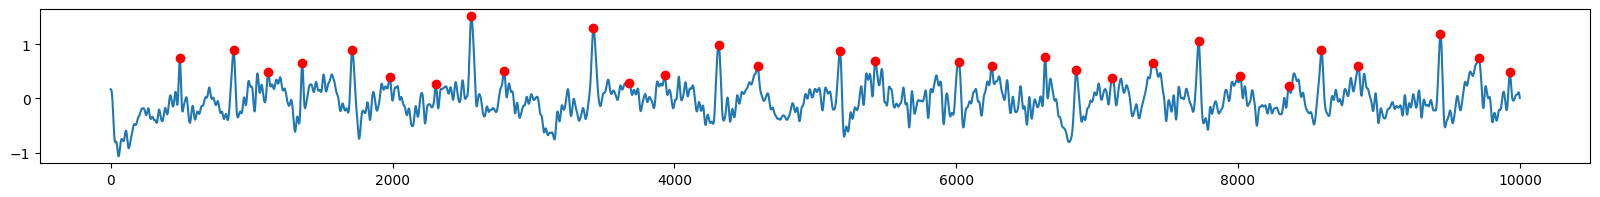

In [11]:
plt.figure(figsize=(20, 2))
plt.plot(phys_ecg.data[:10*1000])
peaks_idx = phys_ecg.peaks[phys_ecg.peaks<10*1000]
plt.plot(peaks_idx, phys_ecg.data[peaks_idx], 'ro')
plt.show()

In [12]:
peaks_idx.shape

(30,)

<div class="alert alert-block alert-info">
<b>Wait... Does that make sense ?</b>
<br>We have more than 20 peaks for 10 secondes, which means that we have an heart rate above 120 bpm ! Although not physiologically impossible, it is not what we should expect. Indeed, when we created our simulated signals, we have specified a desired heart rate of 70 bpm...
</div>

## Automation is useful, but manual check is necessary !

In [13]:
%matplotlib qt
phys_ecg = operations.edit_physio(phys_ecg)

<div class="alert alert-block alert-warning">
<b><code>edit_physio</code> is not working in jupyter notebook ?</b>
<br>If the GUI is not working in jupyter notebook, please try running the python code in your terminal.
</div>

**Let's check what is now happening in the history of our Physio object**

In [14]:
phys_ecg.history

[('filter_physio', {'cutoffs': [0.5, 35], 'method': 'bandpass'}),
 ('peakfind_physio', {}),
 ('delete_peaks',
  {'remove': [13971,
    14327,
    14560,
    14794,
    15429,
    15669,
    16131,
    16576,
    16783,
    17162,
    17394,
    17728,
    18006,
    18269,
    18853,
    19066,
    19302,
    19713,
    20062,
    20577,
    20874,
    21429]}),
 ('add_peaks', {'add': [19713, 20577]})]

In [15]:
# Let's save our hard work !
save_physio('data/sub-test_ses-test_task-test_run-test_desc-peaks.phys', phys_ecg)

'data/sub-test_ses-test_task-test_run-test_desc-peaks.phys'

## Preparing physiological models

In [16]:
# To extract metrics from our signal, we'll use `phys2denoise`
from phys2denoise.metrics import heart_rate_variability
from phys2denoise.metrics.utils import export_metric

In [17]:
phys_ecg = load_physio('data/sub-test_ses-test_task-test_run-test_desc-peaks.phys', allow_pickle=True)
print(phys_ecg.history)

[('filter_physio', {'cutoffs': [0.5, 35], 'method': 'bandpass'}), ('peakfind_physio', {}), ('delete_peaks', {'remove': [13971, 14327, 14560, 14794, 15429, 15669, 16131, 16576, 16783, 17162, 17394, 17728, 18006, 18269, 18853, 19066, 19302, 19713, 20062, 20577, 20874, 21429]}), ('add_peaks', {'add': [19713, 20577]})]


In [18]:
hrv = heart_rate_variability(phys_ecg.data, phys_ecg.peaks, phys_ecg.fs)

In [19]:
plt.figure(figsize=(20, 2))
plt.plot(hrv, label=["hrv", "convolved hrv"])
plt.legend(loc="lower right")
plt.show()

In [20]:
export_metric(
    hrv, phys_ecg.fs, tr=1.5, fileprefix="data/sub-test_ses-test_task-test_run-test_desc-hrv"
)

'data/sub-test_ses-test_task-test_run-test_desc-hrv'

<div class="alert alert-block alert-info">
<b>Variability in heart rate variability</b>
<br> There are different ways to calculate <b>hrv</b>. Currently, <i>phys2denoise</i> is computing the average of the inverse of the time interval
between two heart beats.
</div>

## Wanna contribute ?
Take a look at our [contributor guide](https://physiopy.github.io/contributors-guide/)

In [1]:
from IPython.display import IFrame
IFrame("https://physiopy.github.io/contributors-guide/", 900,500)